# Project 1: SAT & ACT Analysis

## Problem Statement
The SAT is one of two standardized tests used in college admissions, the other being the ACT. The participation rates across states for the two exams vary wildly. My goal was to identify why certain states have low SAT participation rates and make reccomendations to improve those rates in a specific state.

## Executive Summary

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [1]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat17 = pd.read_csv('../data/sat_2017.csv')
act17 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
sat17.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act17.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [5]:
sat17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [6]:
act17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


In [7]:
sat17.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [8]:
act17.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: Data is broken out by state and test section for both tests. The two sections for the SAT are the evidence based reading and writing section and the math section. A combined or total score which appears to be an additon of these two sections is also included. The four ACT sections are English, Math, Reading and Science. A composite score for the ACT dataset is included and appears to be an average of the four sections. The SAT dataset has one less row than the ACT dataset which seems to correspond to the ACT data having an additional row for National results. Both sets of data include paricipation rates for all the states

#### 4a. Does the data look complete? 

Answer: The data appears complete in that there are no null values in our dataset

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: 
Per the collegeboard [website](https://collegereadiness.collegeboard.org/sat/scores/understanding-scores/interpreting), the score ranges for each SAT section ranges from 200 to 800 inclusive leading to a total score of 400 to 1600 inclusive.
Per the Princeton Review [website](https://www.princetonreview.com/college-advice/good-act-scores), the score ranges for each ACT section and the composite score range from 1 to 36 inclusive

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

There's clearly an error with the minimum of the SAT math section for some state since it's under the minimum possible score

In [9]:
#identify the errorneous values
sat17[sat17['Math']<200]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


Per the link above, the actual Maryland Math score should 524, need to make this correction

In [10]:
#assign the correct value
sat17.loc[20,'Math'] = 524

verify that the error has been fixed

In [11]:
#verify the value has been fixed
sat17[sat17['Math']<200]

,State,Participation,Evidence-Based Reading and Writing,Math,Total


In [12]:
#verify there are no other issues
sat17.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,556.882353,1126.098039
std,45.666901,47.121395,92.494812
min,482.000000,468.000000,950.000000
25%,533.500000,523.500000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


There is likely an error with the minimum of the ACT science section being significantly below the other section scores

In [13]:
act17[act17['Science']<10]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


Per the link above, the actual Maryland Science score should 23.2, need to make this correction

In [14]:
act17.loc[21,'Science']=23.2

In [15]:
#verify that the issue has been corrected
act17.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.442308
std,2.332132,1.963602,2.048672,1.723351
min,16.300000,18.000000,18.100000,18.200000
25%,19.000000,19.400000,20.475000,19.975000
50%,20.550000,20.900000,21.700000,21.300000
75%,23.300000,23.100000,24.125000,23.200000
max,25.500000,25.300000,26.000000,24.900000


#### 5. What are your data types? 
Display the data types of each feature. 

In [16]:
sat17.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [17]:
act17.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:
Looking at these data types, it would be beneficial if we could covert both participation columns and the ACT composite column to integers/floats

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.


In [18]:
#code to change the Participation columns from strings to integers
sat17['Participation'] = sat17['Participation'].str.replace('%',"").astype('int')
act17['Participation'] = act17['Participation'].str.replace('%',"").astype('int')

- Fix any individual values preventing other columns from being the appropriate type.

In [19]:
# The composite column is evaluating as a string due to a bad value, got the correct value from the source and changed it
act17.loc[(act17['State']=='Wyoming'),'Composite'] = 20.2

- Finish your data modifications by making sure the columns are now typed appropriately.

In [20]:
#code to recast the column as a float now that all values are numbers
act17['Composite'] = act17[['Composite']].astype(float)

- Display the data types again to confirm they are correct.

In [21]:
#Code to confirm that my data types are now appropriate
act17.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [22]:
#Code to confirm that my data types are now appropriate
sat17.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [23]:
#code to change the column names for the SAT 2017 data
sat17_mapper = {
    'State':'state',
    'Participation':'sat_participation_17',
    'Evidence-Based Reading and Writing':'sat_rw_17',
    'Math':'sat_math_17',
    'Total':'sat_total_17'
}

sat17 = sat17.rename(columns=sat17_mapper, index=str)

In [24]:
sat17.head()

,state,sat_participation_17,sat_rw_17,sat_math_17,sat_total_17
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


In [25]:
#code to change the column names for the SAT 2017 data
act17_mapper = {
    'State':'state',
    'Participation':'act_participation_17',
    'English':'act_english_17',
    'Math':'act_math_17',
    'Reading':'act_reading_17',
    'Science':'act_science_17',
    'Composite':'act_composite_17'
}

act17 = act17.rename(columns=act17_mapper, index=str)

In [26]:
act17.head()

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

**Data Dictionary for 2017 SAT and ACT data**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state_17|object|ACT|The state that the row of data correponds to|
|act_participation_17|int|ACT|The percentage of high school graudates who took the ACT|
|act_english_17|float|ACT|The average score on the ACT English section|
|act_math_17|float|ACT|The average score on the ACT Math section|
|act_reading_17|float|ACT|The average score on the ACT Reading section|
|act_science_17|float|ACT|The average score on the ACT Science section|
|act_composite_17|float|ACT|The average overall score on the ACT|
|state_17|object|SAT|The state that the row of data correponds to|
|sat_participation_17|int|SAT|The percentage of high school graudates who took the SAT|
|sat_rw_17|int|SAT|The average Evidence-Based Reading and Writing score on the SAT|
|sat_math_17|int|SAT|The average math score on the SAT|
|sat_total_17|int|SAT|The average total score on the SAT|


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [27]:
#code to drop the 'National column'
act17 = act17.drop('0')

In [28]:
#validate that the column has been dropped
act17.head()

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4
5,California,31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [29]:
#Code to merge the 2017 ACT and 2017 SAT dataframes
test17 = pd.merge(act17,sat17,how='left')
test17.head()

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_17,sat_rw_17,sat_math_17,sat_total_17
0,Alabama,100,18.9,18.4,19.7,19.4,19.2,5,593,572,1165
1,Alaska,65,18.7,19.8,20.4,19.9,19.8,38,547,533,1080
2,Arizona,62,18.6,19.8,20.1,19.8,19.7,30,563,553,1116
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4,3,614,594,1208
4,California,31,22.5,22.7,23.1,22.2,22.8,53,531,524,1055


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [30]:
#code to save the 2017 combined dataframe as a CSV
test17.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [31]:
#import in 2018 data
act18 = pd.read_csv('../data/2018_Data - ACT 2018.csv')
sat18 = pd.read_csv('../data/2018_Data - SAT 2018.csv')

In [32]:
#review data
act18.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [33]:
#continue reviewing data
act18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
State            52 non-null object
Participation    52 non-null object
Composite        52 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [34]:
#continue reviewing data
act18.describe()

,Composite
count,52.000000
mean,21.544231
std,2.119417
min,17.700000
25%,19.975000
50%,21.300000
75%,23.725000
max,25.600000


In [35]:
#change participation column to an int
act18['Participation'] = act18['Participation'].str.replace('%',"").astype('int')

In [36]:
#there appears to be an extra column per calculations later in this notebook, used this code to find and drop the extra column
act18

,State,Participation,Composite
0,Alabama,100,19.1
1,Alaska,33,20.8
2,Arizona,66,19.2
3,Arkansas,100,19.4
4,California,27,22.7
5,Colorado,30,23.9
6,Connecticut,26,25.6
7,Delaware,17,23.8
8,District of columbia,32,23.6
9,Florida,66,19.9


In [37]:
#maine is in here twice, addressing that
act18 = act18.drop(19)

In [38]:
#DC value is not formatted the same, addressing
act18.loc[(act18['State']=='District of columbia'),'State'] = 'District of Columbia'

In [39]:
#validation
act18.head()

,State,Participation,Composite
0,Alabama,100,19.1
1,Alaska,33,20.8
2,Arizona,66,19.2
3,Arkansas,100,19.4
4,California,27,22.7


In [40]:
#continued validation
act18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 51
Data columns (total 3 columns):
State            51 non-null object
Participation    51 non-null int64
Composite        51 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ KB


In [41]:
#continued validation
act18.dtypes

State             object
Participation      int64
Composite        float64
dtype: object

In [42]:
sat18.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [43]:
#look into the SAT 2018 dataset
sat18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [44]:
#continue analyzing the SAT 2018 dataset
sat18.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [45]:
#change participation column to an int
sat18['Participation'] = sat18['Participation'].str.replace('%',"").astype('int')

In [46]:
#verify changes were made
sat18.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [47]:
#additional verification
sat18.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6,595,571,1166
1,Alaska,43,562,544,1106
2,Arizona,29,577,572,1149
3,Arkansas,5,592,576,1169
4,California,60,540,536,1076


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [48]:
#rename columns for SAT
sat18_mapper = {
    'State':'state',
    'Participation':'sat_participation_18',
    'Evidence-Based Reading and Writing':'sat_rw_18',
    'Math':'sat_math_18',
    'Total':'sat_total_18'
}

sat18 = sat18.rename(columns=sat18_mapper, index=str)

In [49]:
#rename columns for ACT
act18_mapper = {
    'State':'state',
    'Participation':'act_participation_18',
    'Composite':'act_composite_18'
}

act18 = act18.rename(columns=act18_mapper, index=str)

In [50]:
#merge everything
test_data = pd.merge(test17,sat18,how='left')
test_data = pd.merge(test_data,act18,how='left')

In [51]:
#validate output
test_data.head()

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_17,sat_rw_17,sat_math_17,sat_total_17,sat_participation_18,sat_rw_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18
0,Alabama,100,18.9,18.4,19.7,19.4,19.2,5,593,572,1165,6,595,571,1166,100,19.1
1,Alaska,65,18.7,19.8,20.4,19.9,19.8,38,547,533,1080,43,562,544,1106,33,20.8
2,Arizona,62,18.6,19.8,20.1,19.8,19.7,30,563,553,1116,29,577,572,1149,66,19.2
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4,3,614,594,1208,5,592,576,1169,100,19.4
4,California,31,22.5,22.7,23.1,22.2,22.8,53,531,524,1055,60,540,536,1076,27,22.7


In [52]:
#convert final dataframe to CSV file
test_data.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [53]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
act_participation_17,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_english_17,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math_17,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_reading_17,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_science_17,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_composite_17,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
sat_participation_17,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_rw_17,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math_17,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_total_17,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [54]:
def calc_std(series):
    mean = series.mean()
    cum_sum = 0
    for entry in series:
        cum_sum += (entry - mean)**2
    return np.sqrt(cum_sum/len(series))
        

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [55]:
#dictionary of variables and their standard deviation according to the calc_std function
{entry:calc_std(test_data[entry]) for entry in test_data if test_data[entry].dtype != object}

{'act_participation_17': 31.824175751231806,
 'act_english_17': 2.3304876369363363,
 'act_math_17': 1.9624620273436781,
 'act_reading_17': 2.0469029314842646,
 'act_science_17': 1.7222161451443676,
 'act_composite_17': 2.000786081581989,
 'sat_participation_17': 34.92907076664508,
 'sat_rw_17': 45.21697020437866,
 'sat_math_17': 46.65713364485503,
 'sat_total_17': 91.58351056778743,
 'sat_participation_18': 36.946619223539415,
 'sat_rw_18': 47.03460978357609,
 'sat_math_18': 47.30194550378352,
 'sat_total_18': 93.22742384464433,
 'act_participation_18': 33.70173582041031,
 'act_composite_18': 2.090779082141178}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [56]:
#dictionary of variables and their standard deviation according to the numpy std function
{entry:np.std(test_data[entry]) for entry in test_data if test_data[entry].dtype != object}

{'act_participation_17': 31.824175751231806,
 'act_english_17': 2.3304876369363363,
 'act_math_17': 1.9624620273436781,
 'act_reading_17': 2.0469029314842646,
 'act_science_17': 1.7222161451443676,
 'act_composite_17': 2.000786081581989,
 'sat_participation_17': 34.92907076664508,
 'sat_rw_17': 45.21697020437866,
 'sat_math_17': 46.65713364485503,
 'sat_total_17': 91.58351056778743,
 'sat_participation_18': 36.946619223539415,
 'sat_rw_18': 47.03460978357609,
 'sat_math_18': 47.30194550378352,
 'sat_total_18': 93.22742384464433,
 'act_participation_18': 33.70173582041031,
 'act_composite_18': 2.090779082141178}

Answer:

These answers do not match up with the standard deviation of the panda's describe function but do match with numpy's standard deviation function, the reasoning is the pandas function divides by n-1 while the formula we (and numpy) use divides by n. The difference is due to Bessel's correction

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

**Participation Rate Analysis**

In [57]:
test_data.sort_values('sat_participation_17')[['state','sat_participation_17']].head()

,state,sat_participation_17
34,North Dakota,2
24,Mississippi,2
15,Iowa,2
25,Missouri,3
44,Utah,3


In [58]:
test_data.sort_values('sat_participation_17',ascending = False)[['state','sat_participation_17']].head()

,state,sat_participation_17
8,District of Columbia,100
22,Michigan,100
6,Connecticut,100
7,Delaware,100
29,New Hampshire,96


In [59]:
test_data.sort_values('sat_participation_18')[['state','sat_participation_18']].head(10)

,state,sat_participation_18
34,North Dakota,2
50,Wyoming,3
41,South Dakota,3
27,Nebraska,3
49,Wisconsin,3
24,Mississippi,3
15,Iowa,3
44,Utah,4
23,Minnesota,4
18,Louisiana,4


In [60]:
test_data.sort_values('sat_participation_18',ascending = False)[['state','sat_participation_18']].head(10)

,state,sat_participation_18
5,Colorado,100
6,Connecticut,100
7,Delaware,100
22,Michigan,100
12,Idaho,100
19,Maine,99
13,Illinois,99
39,Rhode Island,97
29,New Hampshire,96
8,District of Columbia,92


In [61]:
test_data.sort_values('act_participation_17')[['state','act_participation_17']].head()

,state,act_participation_17
19,Maine,8
29,New Hampshire,18
7,Delaware,18
39,Rhode Island,21
38,Pennsylvania,23


In [62]:
test_data.sort_values('act_participation_17',ascending = False)[['state','act_participation_17']].head(20)

,state,act_participation_17
0,Alabama,100
17,Kentucky,100
49,Wisconsin,100
44,Utah,100
42,Tennessee,100
40,South Carolina,100
36,Oklahoma,100
33,North Carolina,100
28,Nevada,100
26,Montana,100


In [63]:
test_data.sort_values('act_participation_18')[['state','act_participation_18']].head()

,state,act_participation_18
19,Maine,7
39,Rhode Island,15
29,New Hampshire,16
7,Delaware,17
38,Pennsylvania,20


In [64]:
test_data.sort_values('act_participation_18',ascending = False)[['state','act_participation_18']].head(20)

,state,act_participation_18
0,Alabama,100
17,Kentucky,100
49,Wisconsin,100
44,Utah,100
42,Tennessee,100
40,South Carolina,100
36,Oklahoma,100
35,Ohio,100
33,North Carolina,100
28,Nevada,100


Analysis of states with high and low SAT / ACT participation rates, it's interesting to see that these vary wildly and both tests have states at 100% participation

**Composite/Total Score Analysis**

In [65]:
test_data.sort_values('sat_total_17')[['state','sat_total_17']].head()

,state,sat_total_17
8,District of Columbia,950
7,Delaware,996
12,Idaho,1005
22,Michigan,1005
19,Maine,1012


In [66]:
test_data.sort_values('sat_total_17',ascending = False)[['state','sat_total_17']].head()

,state,sat_total_17
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260


In [67]:
test_data.sort_values('sat_total_18')[['state','sat_total_18']].head()

,state,sat_total_18
8,District of Columbia,977
7,Delaware,998
48,West Virginia,999
12,Idaho,1001
44,Utah,1010


In [68]:
test_data.sort_values('sat_total_18',ascending = False)[['state','sat_total_18']].head()

,state,sat_total_18
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
15,Iowa,1265
16,Kansas,1265


In [69]:
test_data.sort_values('act_composite_17')[['state','act_composite_17']].head()

,state,act_composite_17
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1


In [70]:
test_data.sort_values('act_composite_17',ascending=False)[['state','act_composite_17']].head()

,state,act_composite_17
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


In [71]:
test_data.sort_values('act_composite_18')[['state','act_composite_18']].head()

,state,act_composite_18
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1


In [72]:
test_data.sort_values('act_composite_18',ascending=False)[['state','act_composite_18']].head()

,state,act_composite_18
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.2


Analysis of states with high and low SAT / ACT overall scores, there may be a negative connection between test score and participation rate.

**Do any states with 100% participation on a given test have a rate change year-to-year?**

Identify states who increased their ACT participation rate to 100%

In [73]:
test_data[(test_data['act_participation_18'] == 100)&(test_data['act_participation_17']<100)]\
[['state','act_participation_17','act_participation_18']]

,state,act_participation_17,act_participation_18
27,Nebraska,84,100
35,Ohio,75,100


Identify states who decreased their ACT participation rate from 100%

In [74]:
test_data[(test_data['act_participation_18'] < 100)&(test_data['act_participation_17']==100)]\
[['state','act_participation_17','act_participation_18']]

,state,act_participation_17,act_participation_18
5,Colorado,100,30
23,Minnesota,100,99


For the ACT, it looks like Nebraska and Ohio joined the states with 100% participation in 2018 and Minnesota and Colorado left the states with 100% participation

Identify states who increased their SAT participation rate to 100%

In [75]:
test_data[(test_data['sat_participation_18'] == 100)&(test_data['sat_participation_17']<100)]\
[['state','sat_participation_17','sat_participation_18']]

,state,sat_participation_17,sat_participation_18
5,Colorado,11,100
12,Idaho,93,100


Identify states who increased their SAT participation rate to 100%

In [76]:
test_data[(test_data['sat_participation_18'] < 100)&(test_data['sat_participation_17']==100)]\
[['state','sat_participation_17','sat_participation_18']]

,state,sat_participation_17,sat_participation_18
8,District of Columbia,100,92


For the SAT, it looks like Colorado and Idaho joined the states with 100% participation in 2018 and the district of Columbuia left the states with 100% participation.

**Do any states show have >50% participation on both tests either year?**

In [77]:
test_data[(test_data['sat_participation_17'] > 50)&(test_data['act_participation_17'] > 50)]

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_17,sat_rw_17,sat_math_17,sat_total_17,sat_participation_18,sat_rw_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18
9,Florida,73,19.0,19.4,21.0,19.4,19.8,83,520,497,1017,56,550,549,1099,66,19.9
10,Georgia,55,21.0,20.9,22.0,21.3,21.4,61,535,515,1050,70,542,522,1064,53,21.4
11,Hawaii,90,17.8,19.2,19.2,19.3,19.0,55,544,541,1085,56,480,530,1010,89,18.9


In [78]:
test_data[(test_data['sat_participation_18'] > 50)&(test_data['act_participation_18'] > 50)]

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_17,sat_rw_17,sat_math_17,sat_total_17,sat_participation_18,sat_rw_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18
9,Florida,73,19.0,19.4,21.0,19.4,19.8,83,520,497,1017,56,550,549,1099,66,19.9
10,Georgia,55,21.0,20.9,22.0,21.3,21.4,61,535,515,1050,70,542,522,1064,53,21.4
11,Hawaii,90,17.8,19.2,19.2,19.3,19.0,55,544,541,1085,56,480,530,1010,89,18.9
33,North Carolina,100,17.8,19.3,19.6,19.3,19.1,49,546,535,1081,52,554,543,1098,100,19.1
40,South Carolina,100,17.5,18.6,19.1,18.9,18.7,50,543,521,1064,55,547,523,1070,100,18.3


It looks like Flordia, Georgia and Hawaii had greater than 50% participation in both tests in both 2017 and 2018. North and South Carolina had greater than 50% participation for both tests just in 2018

**Additional Things**
Colorado is a state of particular interest having gone from 100% ACT participation in 2017 to 100% SAT participation in 2018

**Additional Analysis**

Explore the connection between test participation rate and average test score

In [79]:
test_data['sat_total_18'].mean()

1120.0196078431372

In [80]:
test_data[(test_data['sat_participation_18'] < 20)][['sat_participation_18','sat_total_18']].sort_values('sat_total_18')

,sat_participation_18,sat_total_18
44,4,1010
36,8,1062
31,16,1093
35,18,1099
0,6,1166
3,5,1169
26,10,1198
18,4,1210
42,6,1231
24,3,1236


In [81]:
test_data['act_composite_18'].mean()

21.49607843137255

In [82]:
test_data[(test_data['act_participation_18'] < 30)][['act_participation_18','act_composite_18']].sort_values('act_composite_18')

,act_participation_18,act_composite_18
47,24,22.2
4,27,22.7
38,20,23.5
7,17,23.8
46,24,23.9
19,7,24.0
45,24,24.1
22,22,24.2
39,15,24.2
32,27,24.5


Most states with low test participation rates have test scores that are higher than the national average

Try to identify a state that has low SAT participation and high ACT participation. Also, avoid 100% ACT participation states since that likely indicates there is something in place that mandates a particular exam

In [83]:
test_data[(test_data['sat_participation_18'] < 30)&(test_data['act_participation_18'] > 70) & (test_data['act_participation_18']<100)]

,state,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_17,sat_rw_17,sat_math_17,sat_total_17,sat_participation_18,sat_rw_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18
16,Kansas,73,21.1,21.3,22.3,21.7,21.7,4,632,628,1260,4,633,631,1265,71,21.6
23,Minnesota,100,20.4,21.5,21.8,21.6,21.5,3,644,651,1295,4,643,655,1298,99,21.3
34,North Dakota,98,19.0,20.4,20.5,20.6,20.3,2,635,621,1256,2,640,643,1283,98,20.3
41,South Dakota,80,20.7,21.5,22.3,22.0,21.8,3,612,603,1216,3,622,618,1240,77,21.9


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

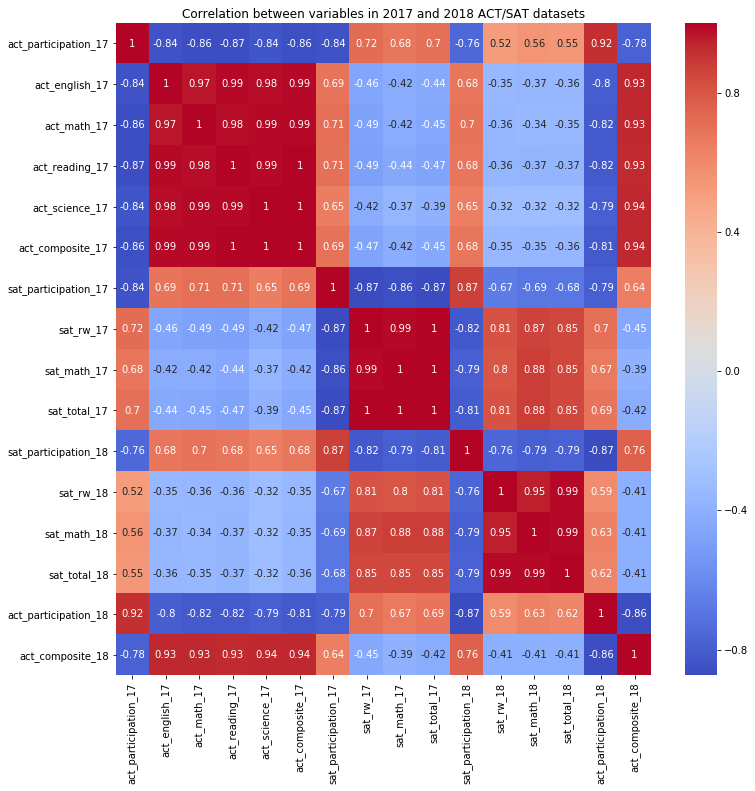

In [84]:
plt.figure(figsize=(12, 12))
plt.title('Correlation between variables in 2017 and 2018 ACT/SAT datasets')
sns.heatmap(test_data.corr(), cmap='coolwarm', annot=True);

Interpretation: Many of the insights we saw in the earlier section are reflected here. In particular, we see there are strong negative correlation between overall test score and test participation

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [85]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(12,12)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])

    plt.tight_layout(); 


#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

**Participation rates for SAT & ACT**

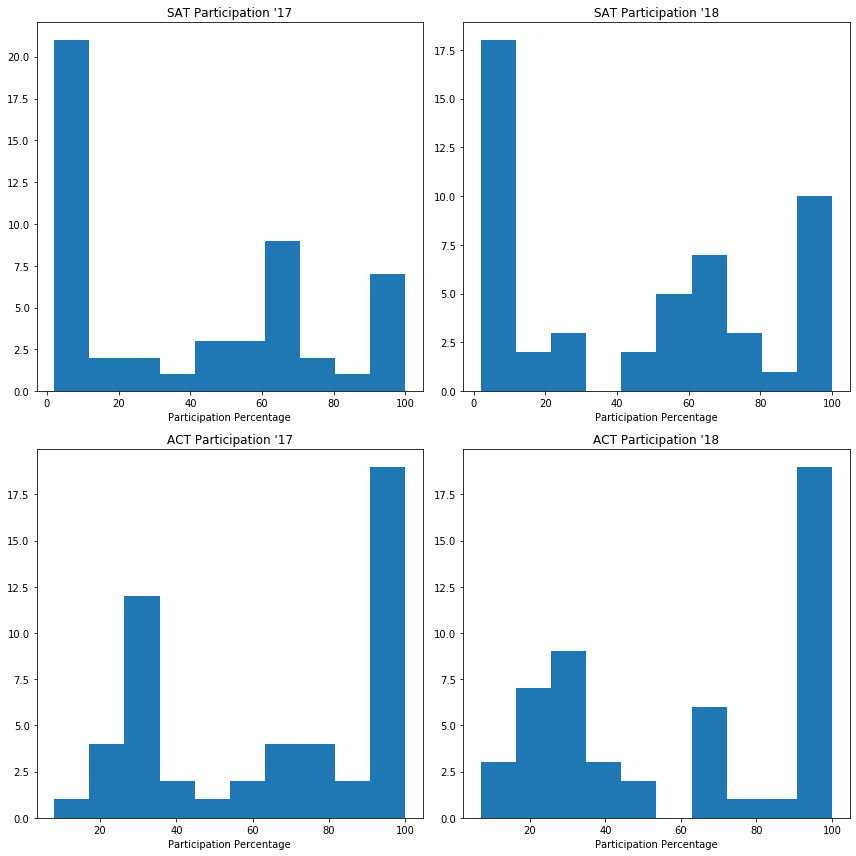

In [86]:

subplot_histograms(test_data,['sat_participation_17','sat_participation_18','act_participation_17',\
                             'act_participation_18'],['SAT Participation \'17','SAT Participation \'18',\
                            'ACT Participation \'17','ACT Participation \'18'],['Participation Percentage']*4)

Interpretation: There are more states with close to or at 100% ACT participation than close to or at 100% SAT participation. There are more states with close to or at 0% SAT participation than close to or at 0% ACT participation

**Math scores for SAT & ACT**

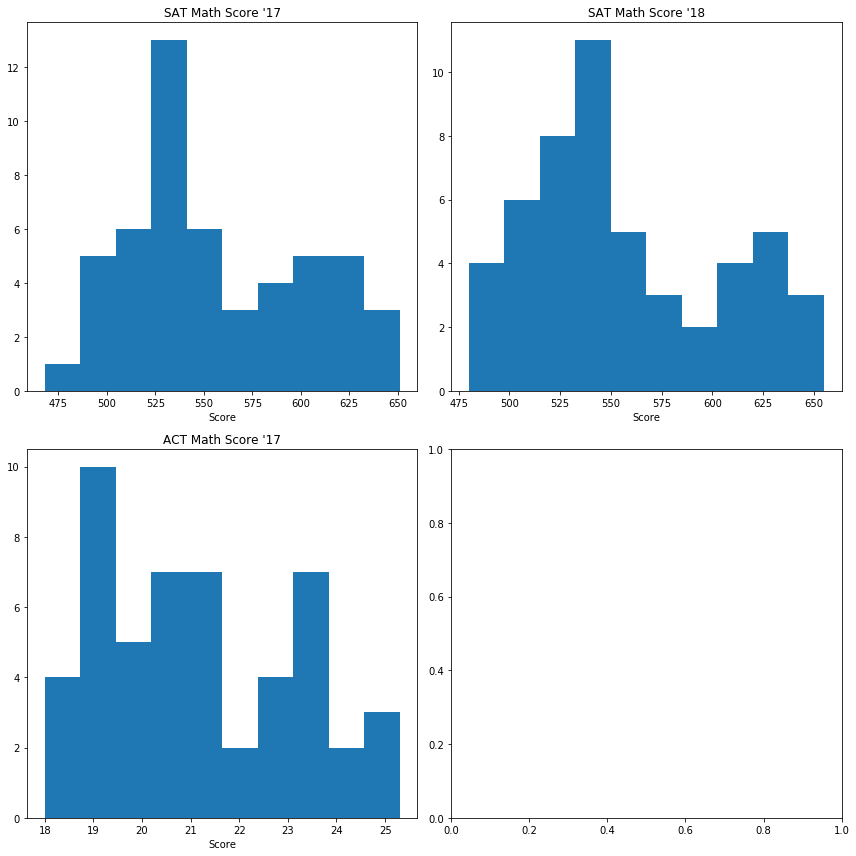

In [87]:

subplot_histograms(test_data,['sat_math_17','sat_math_18','act_math_17'],\
                   ['SAT Math Score \'17','SAT Math Score \'18','ACT Math Score \'17'],\
                   ['Score']*3)

Interpretation: The average state math score for both the SAT and ACT seem to right skewed

**Reading/verbal scores for SAT & ACT**

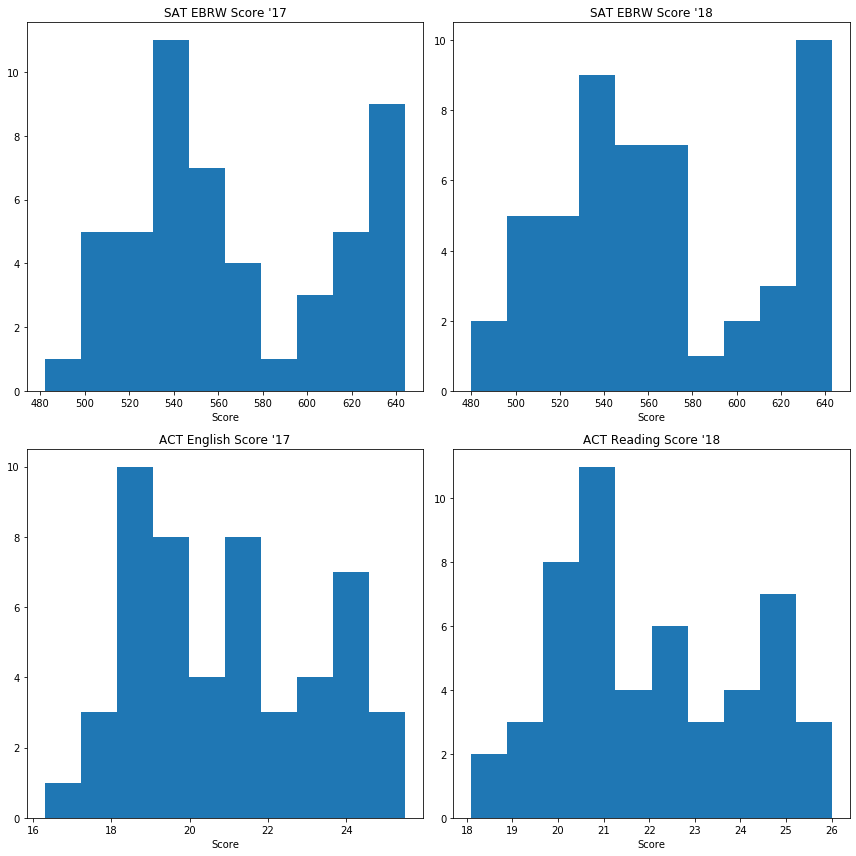

In [88]:
subplot_histograms(test_data,['sat_rw_17','sat_rw_18','act_english_17','act_reading_17'],\
                              ['SAT EBRW Score \'17','SAT EBRW Score \'18','ACT English Score \'17',\
                              'ACT Reading Score \'18'],['Score']*4)

Interpretation, the ACT reading and writing scores seem to be right skewed. The SAT EBRW scores seem to have two peaks. One peak is towards the lower end of the score range and the other is at the high end of the score range.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [89]:
def scatterplot(x_data,y_data,title,x_label,y_label):
# Establish the size of the figure.
    plt.figure(figsize=(12, 6))

# Create scatter plot of high prices versus volume.
    plt.scatter(x_data,y_data,s = 50)

    plt.title(title, fontsize = 20)
    plt.xlabel(x_label, fontsize = 10)
    plt.ylabel(y_label, fontsize = 10);

**Scatterplot of SAT vs. ACT math scores for 2017**

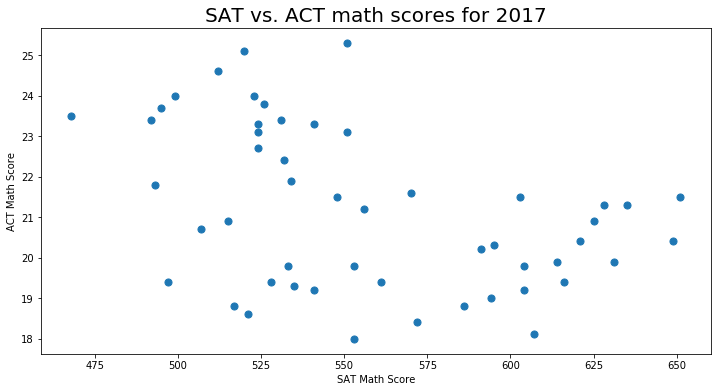

In [90]:
scatterplot(test_data['sat_math_17'],test_data['act_math_17'],"SAT vs. ACT math scores for 2017",\
            "SAT Math Score","ACT Math Score")

Interpretation: there appears to be a negative correlation between the SAT math score and the ACT math score

**Scatterplot for SAT vs. ACT verbal/reading scores for 2017**

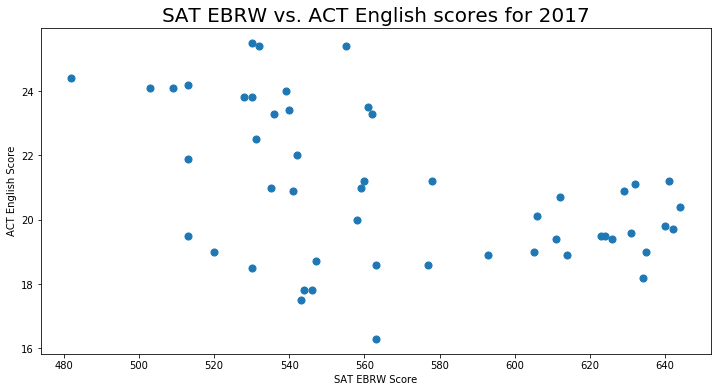

In [91]:
scatterplot(test_data['sat_rw_17'],test_data['act_english_17'],"SAT EBRW vs. ACT English scores for 2017",\
            "SAT EBRW Score","ACT English Score")

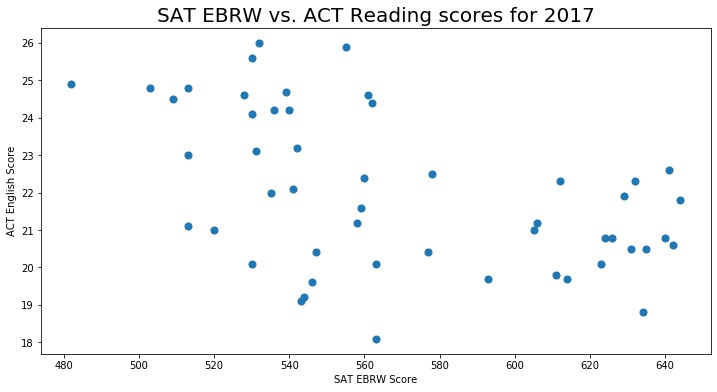

In [92]:
scatterplot(test_data['sat_rw_17'],test_data['act_reading_17'],"SAT EBRW vs. ACT Reading scores for 2017",\
            "SAT EBRW Score","ACT English Score")

Interpretation: there also appears to be a negative correlation between the state's EBRW SAT score and the state's ACT Reading or English scores; this correlation does not appear to be as strong as the one between the SAT and ACT Math scores

**Scatterplot of SAT vs. ACT total/composite scores for 2017**

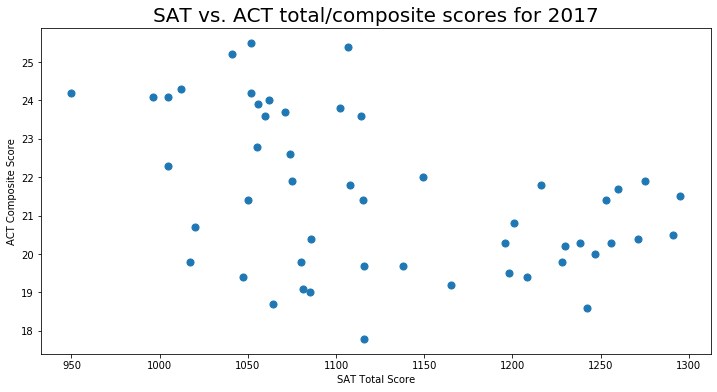

In [93]:
scatterplot(test_data['sat_total_17'],test_data['act_composite_17'],"SAT vs. ACT total/composite scores for 2017",\
            "SAT Total Score","ACT Composite Score")

Interpretation: There appears to be a negative correlation between the state's SAT total score and the state's ACT composite score

**Scatterplot of Total scores for SAT 2017 vs. 2018**

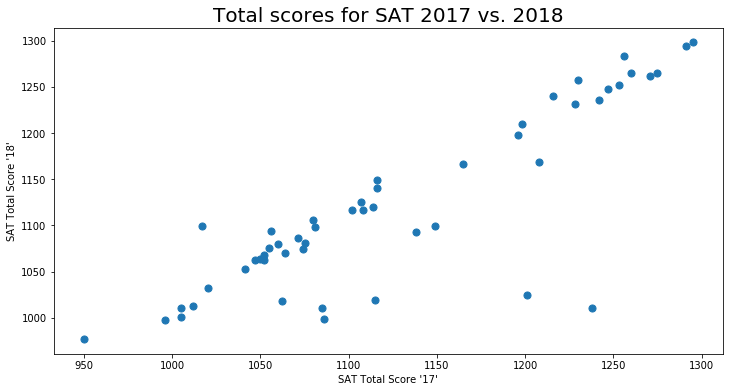

In [94]:
scatterplot(test_data['sat_total_17'],test_data['sat_total_18'],"Total scores for SAT 2017 vs. 2018",\
            "SAT Total Score \'17'","SAT Total Score \'18'")

Interpretation: There appears to be a strong, positive correlation between a state's 2017 SAT Total score and the state's 2018 SAT Total score

**Scatterplot of composite scores for ACT 2017 vs. 2018**

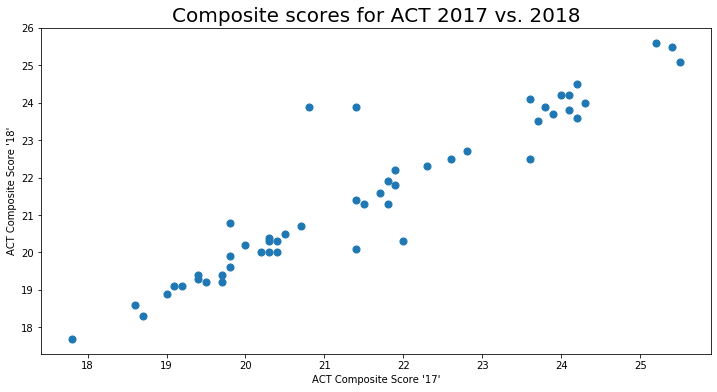

In [95]:
scatterplot(test_data['act_composite_17'],test_data['act_composite_18'],"Composite scores for ACT 2017 vs. 2018",\
            "ACT Composite Score \'17'","ACT Composite Score \'18'")

Interpretation: There appears to be a strong, positive correlation between a state's 2017 ACT Composite score and the state's 2018 ACT Composite score

**Scatterplot of particpation rates for ACT and SAT (2017)**

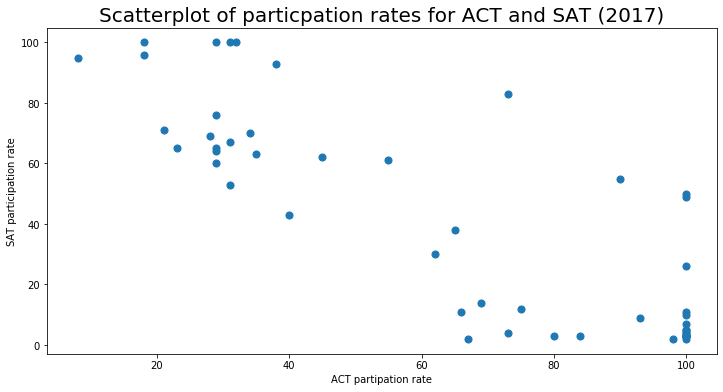

In [96]:
scatterplot(test_data['act_participation_17'],test_data['sat_participation_17'],\
            "Scatterplot of particpation rates for ACT and SAT (2017)",\
            "ACT partipation rate","SAT participation rate")

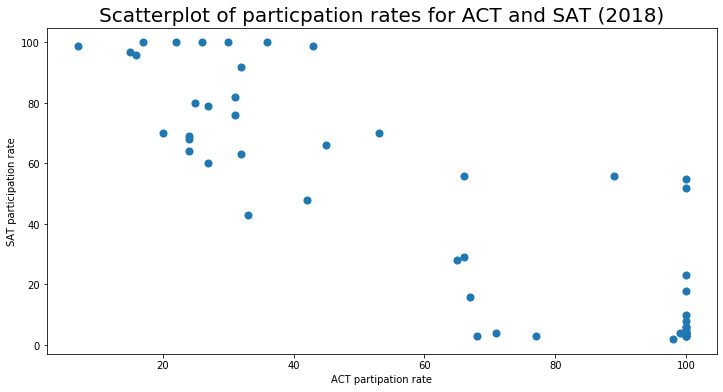

In [97]:
scatterplot(test_data['act_participation_18'],test_data['sat_participation_18'],\
            "Scatterplot of particpation rates for ACT and SAT (2018)",\
            "ACT partipation rate","SAT participation rate")

Interpretation: there's definitely a strong negative correlation between ACT and SAT participation rates

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

**SAT Total Score Comparison between 2017 and 2018**

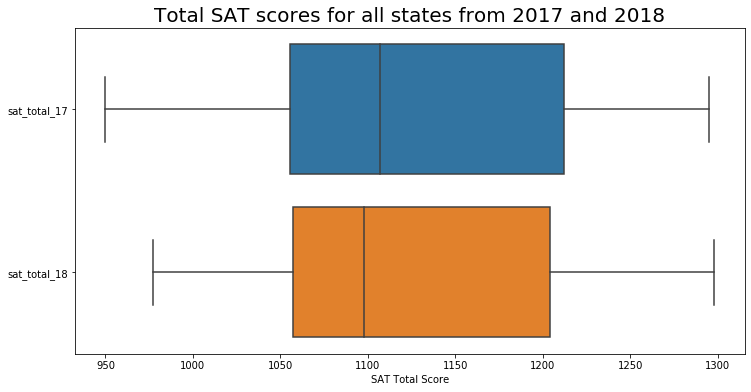

In [98]:
plt.figure(figsize=(12, 6))
plt.title("Total SAT scores for all states from 2017 and 2018", fontsize = 20)
plt.xlabel("SAT Total Score", fontsize = 10)
sns.boxplot(data = test_data[['sat_total_17','sat_total_18']],orient = "h");

Interpretation: It looks like the range of total SAT scores for states decreased from 2017 to 2018, the median also decreased between the two years

**ACT Composite Score Comparison between 2017 and 2018**

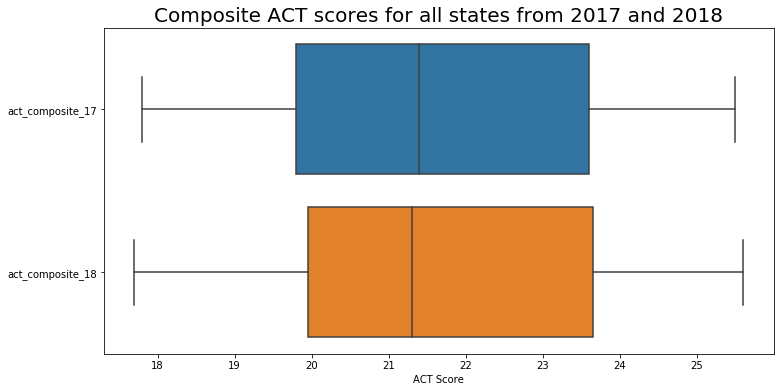

In [99]:
plt.figure(figsize=(12, 6))
plt.title("Composite ACT scores for all states from 2017 and 2018", fontsize = 20)
plt.xlabel("ACT Score", fontsize = 10)
sns.boxplot(data = test_data[['act_composite_17','act_composite_18']],orient = "h");

Interpretation: It looks like the range of composite ACT scores for states increased from 2017 to 2018, the median composite score however decreased between the two years

**SAT individual section score breakdown 2017 and 2018**

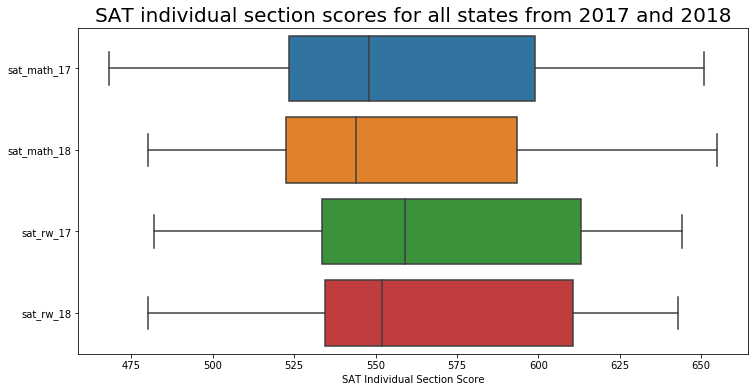

In [100]:
plt.figure(figsize=(12, 6))
plt.title("SAT individual section scores for all states from 2017 and 2018", fontsize = 20)
plt.xlabel("SAT Individual Section Score", fontsize = 10)
sns.boxplot(data = test_data[['sat_math_17','sat_math_18','sat_rw_17','sat_rw_18']],orient = "h");

Interpretation: The median evidence based reading and writing scores were higher than those of the math section, the median scores for 2017 were higher than those in 2018. In addition, the range of math scores was larger than those of the reading/writing section.

**ACT individual section score breakdown 2017**

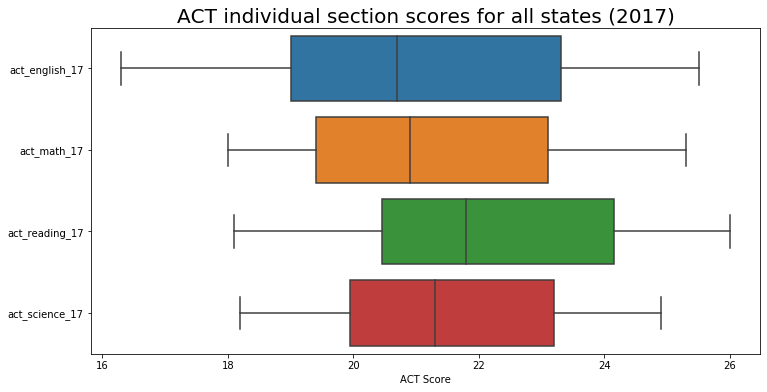

In [101]:
plt.figure(figsize=(12, 6))
plt.title("ACT individual section scores for all states (2017)", fontsize = 20)
plt.xlabel("ACT Score", fontsize = 10)
sns.boxplot(data = test_data[['act_english_17','act_math_17','act_reading_17','act_science_17']],orient = "h");

Interpretation: The section with the greatest range of scores and the lowest median was the ACT English section. The ACT science section had the smallest range and the ACT reqding section had the highest median score.

**SAT and ACT participation rates (2017/2018)**

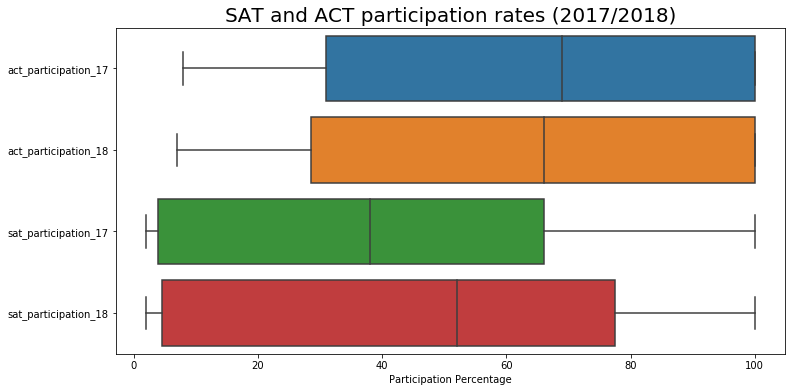

In [102]:
plt.figure(figsize=(12, 6))
plt.title("SAT and ACT participation rates (2017/2018)", fontsize = 20)
plt.xlabel("Participation Percentage", fontsize = 10)
sns.boxplot(data = test_data[['act_participation_17','act_participation_18',\
                              'sat_participation_17','sat_participation_18']],orient = "h");

Interpretation: The participation ranges for the tests are roughly equal, spanning pretty much the entire section from a little above 0 up to 100. The ACT does appear to be the test with a much greater participation with both a much higher median in both years and a much higher inner quartile range. It does appear that between 2017 and 2018, the median ACT participation rate dropped slightly while the median SAT participation rate increqased significantly.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

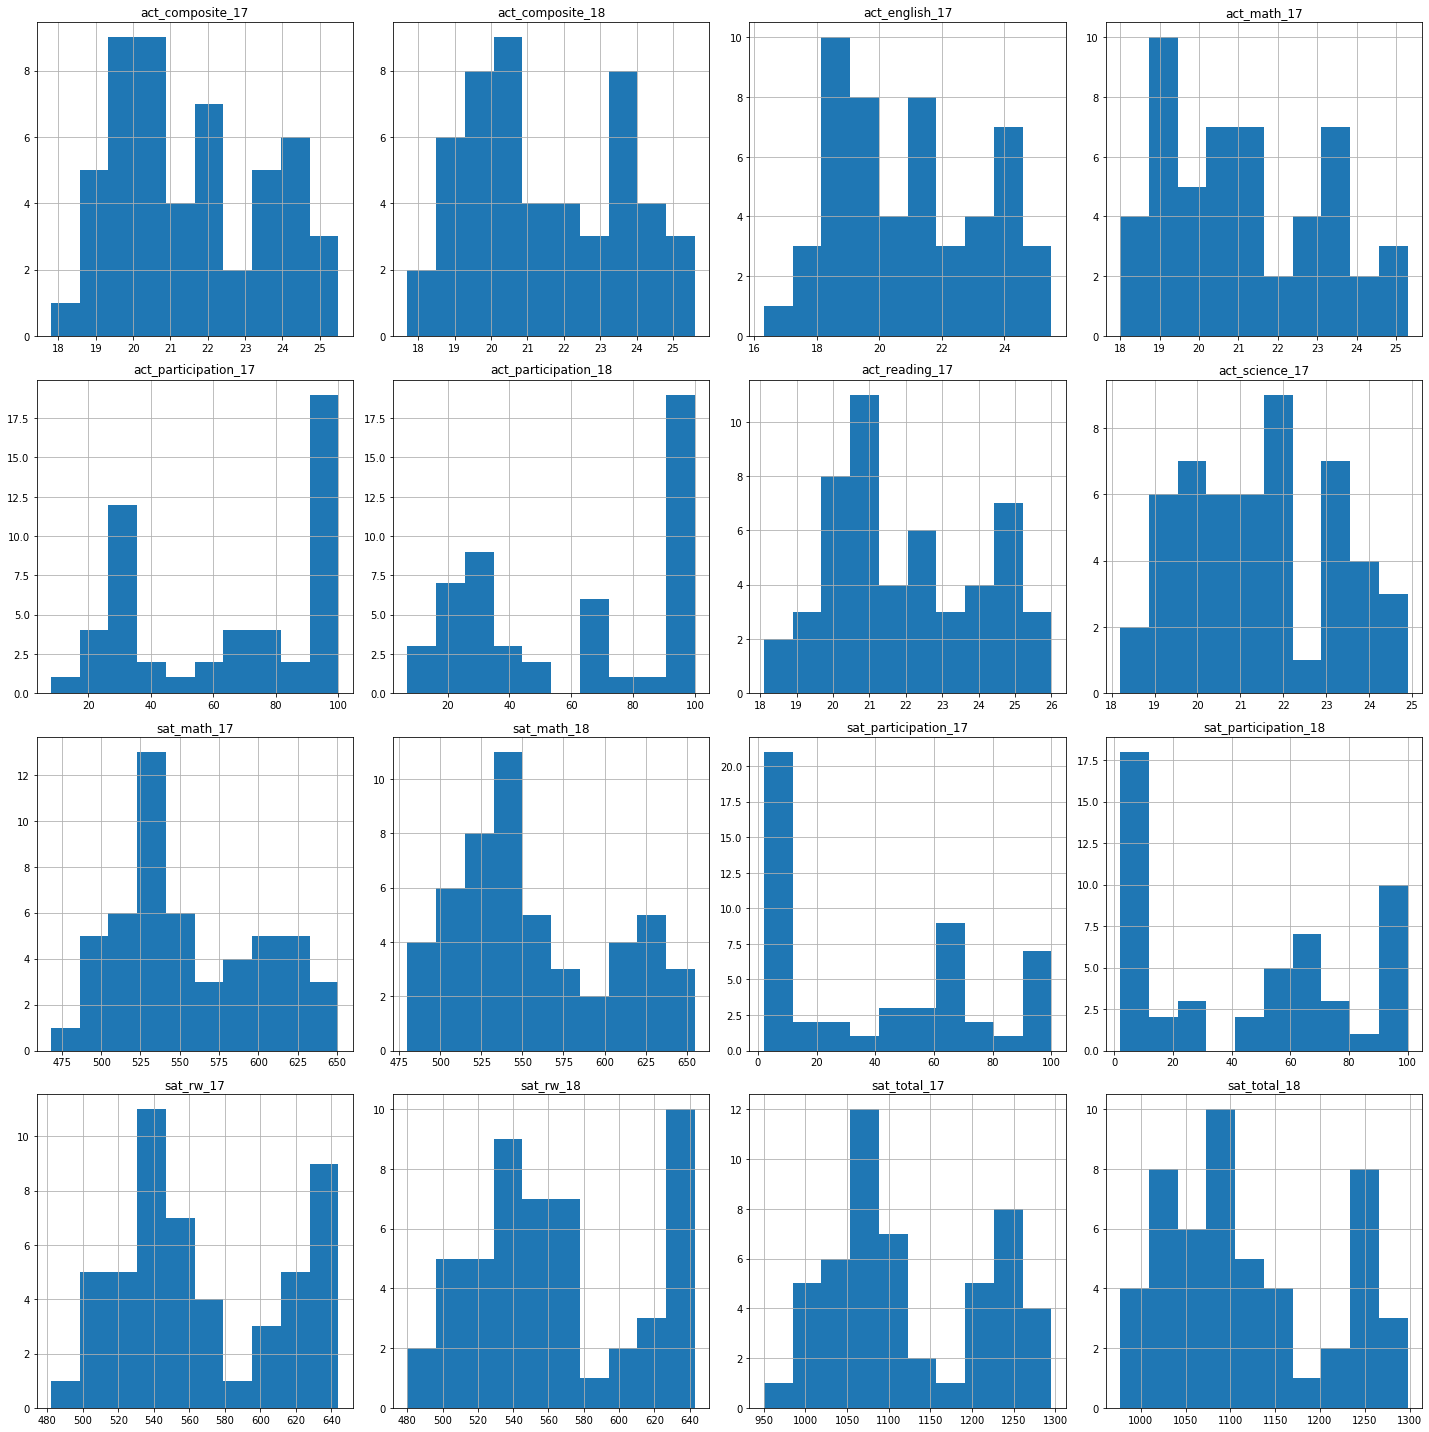

In [103]:
test_data.hist(figsize=(20, 20))
plt.tight_layout();

In [104]:
test_data.describe().loc[['mean','50%']]

,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_17,sat_rw_17,sat_math_17,sat_total_17,sat_participation_18,sat_rw_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18
mean,65.254902,20.931373,21.182353,22.013725,21.45098,21.519608,39.803922,569.117647,556.882353,1126.098039,45.745098,563.686275,556.235294,1120.019608,61.72549,21.496078
50%,69.000000,20.700000,20.900000,21.800000,21.30000,21.400000,38.000000,559.000000,548.000000,1107.000000,52.000000,552.000000,544.000000,1098.000000,66.00000,21.300000


|Variable|Dataset|Description|
|---|---|---|
|act_composite_17|ACT|The ACT 2017 composite score has a mean 21.5 and a median of 21.4 so the data mostly centrally distributed and not very skewed
|act_composite_18|ACT|The ACT 2018 composite score has a mean 21.5 and a median of 21.3 so the data mostly centrally distributed and not very skewed
|act_english_17|ACT|The mean of this distribution is 20.9 and the median is 20.7. A visual inspection on a larger histogram from the previous section shows a slight right skew
|act_math_17|ACT|The mean of this distribution is 21.1 and the median is 20.9. A visual inspection on a larger histogram from the previous section shows a slight right skew
|act_reading_17|ACT|The mean of this distribution is 22.0 and the median is 21.8. A visual inspection on a larger histogram from the previous section shows a slight right skew
|act_science_17|ACT|The mean of this distribution is 21.5 and the median is 21.3. This backs up the visual observation that the data is mostly centrally distributed and not very skewed
|sat_rw_17|SAT|The mean for this distributon is 569 and the median is 559. This indicates that the data is centrally distributed but observing the histogram indicates a significant number of states with an average at the high end of the score range
|sat_rw_18|SAT|The mean for this distributon is 564 and the median is 552. This indicates that the data is centrally distributed but observing the histogram indicates a significant number of states with an average at the high end of the score range
|sat_math_17|SAT|The mean of this distribution is 557 and the median is 548. A visual inspection on a larger histogram from the previous section shows a slight right skew
|sat_math_18|SAT|The mean of this distribution is 556 and the median is 544. A visual inspection on a larger histogram from the previous section shows a slight right skew
|sat_total_17|SAT|The mean for this distributon is 1126 and the median is 1107. This seems to indicate that the data is centrally distributed but observing the histogram indicates that the distribution appears to have two peaks. The larger peak is towards the lower end of the range but there is a peak at the higher end of the range as well
|sat_total_18|SAT|The mean for this distributon is 1120 and the median is 1098. This seems to indicate that the data is centrally distributed but observing the histogram indicates that the distribution appears to have two peaks. The larger peak is towards the lower end of the range but there is a peak at the higher end of the range as well
|act_participation_17|ACT|The data is not centrally distributed, it instead appears that most values are at the high end of the range
|act_participation_18|ACT|The data is not centrally distributed, it instead appears that most values are at the high end of the range
|sat_participation_17|SAT|The data is not centrally distributed, it instead appears that most values are at the low end of the range
|sat_participation_18|SAT|The data is not centrally distributed, it instead appears that most values are at the low end of the range though there's a small peak at the high end of the range

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: This appears to be somewhat true for some of the variables and definitely not for others

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: The ACT scores, both individual section and composite, seem to somewhat follow a normal distribution. The SAT math scores from both years do as well though to a lesser extent. The SAT reading/writing and total scores do not appear to follow a normal distribution and the participation rates definitely do not appear to follow a normal distribution

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: No, it does not, statistical inference involves gathering data from a sample population and than applying the conclusions from that sample to the whole population. In this dataset, we're given stats from the whole population so there's no statistical inference needed.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: While it's not inappropriate to compare the SAT and ACT math scores, it's not necessarily appropriate either. The scatterplot of the data indicates a slight negative correlation between the scores but what causes this correlation needs to be considered. Specifically, the state participation rates are very different between the two tests and that's likely a confounding factor in this correlation.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

I don't really feel it's appropriate, the idea of the hypothesis tests that we did in class are given a difference of X between two samples, what are the odds that we would observe this difference in the entire population. However, we already have entire population level data here so we don't need to be making inferences from samples 

## Outside Research

Colorado - This is probably the most interesting state to dig into. Colorado went form 100% ACT participation in 2017 to 30 % in 2018 and 11% SAT participation in 2017 to 100% in 2018. This appears to be due to a law that was passed that changed the college prep exam required by the state from the ACT to the SAT. [Source](https://www.chalkbeat.org/posts/co/2015/12/23/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers/)

Ohio - Ohio went from 75% ACT participation rate in 2017 to 100% in 2018. This is likely due a law that was passed that has all school districts in the state offer a free SAT or ACT to their juniors. The guess was that nearly all districts were going to offer the ACT which seems to be indicated in the data. [Source](https://www.cleveland.com/metro/2017/04/free_sat_or_act_exams_give_all.html)

Nebraska - Nebraska went from 84% to 100% between 2017 and 2018. This appears to be due to legislation passed that made the ACT the state accountability test required for high school junions. [Source](https://www.education.ne.gov/assessment/act/)

## Conclusions and Recommendations

It definitely appears that states seem to favor one test or the other but not both. Many states are at 100% participation and some of this seems to be due to legistlation either offering a version of these tests for free and/or manadating the test as one of the statewide tests required for high shoolers. There is an interesting correlation that many of the states with the lowest participation for the test in question had higher than average scores. This can probably be partially explained by students taking these test when they're not required and thus only taking them because they feel they need them to get into a college which would likely be a higher scoring subset than the full population.

If I was a college board employee, I'd reccomend targeting a state like Kansas for incresing participation. Kansas is a state with low SAT participation (4% in 2017 and 2018) and high but not total ACT participation (73% in 2017 and 71% in 2018). The lack of 100% participation indicates that there probably isn't legislation in place to mandate the taking of the ACT. I'd reccomend that the college board identify what education meausres/outcomes the decision making bodies in Kansas are in favor of and identify how the SAT can help improve those outcomes and try to get legislation passed that uses the SAT as one of the statewide assessments for high schoolers. Some additional data that would be helpful would be info on why past Kansas students preferred the ACT over the SAT and if there have been prior legislative attempts regarding this and the outcomes of those attempts.